# Speckle
## General
 - Numerous elementary-scatterer in an observed pixel will return the same amplitude, but arbitrary phase of an incident EM-wave
 - Radar adds these responses up, which create Speckle's

## What is the main finding of the Central Limit Theorem?
 - Mean-samples of a distribution will form a normal distribution, regardless of the shape of the original distribution

## Why is it important for the interpretation of speckle?

 - The received signal of a pixel can be seen as the sum of independent random variables, since we expect that the real and imaginary part of the received signal have zero mean and the same variance
 - Since we expect the number N of contributing scatterers to be very high, we can retreive information of those pixels by application of CLT

## What constraints must the considered variables obey if their behavior is described within the concept of the Central Limit Theorem
 - Responses of each scatterer are independent to others
 - Changes in amplitude $a_k$ and phase $\phi_k$ of each phasor are completely independent of each other
 - Phase changes of $\phi_k$ are mot likely in the interval of (-$\pi$, $\pi$)
 - All scatterers produce comparable intensity responses

## How does the validity of the Central Limit Theorem depend on the sample size?
 - The more often mean-samples are taken, the more precise the normal distribution becomes
 - The larger the sample size, the more accurate each mean can be calculated

Output()

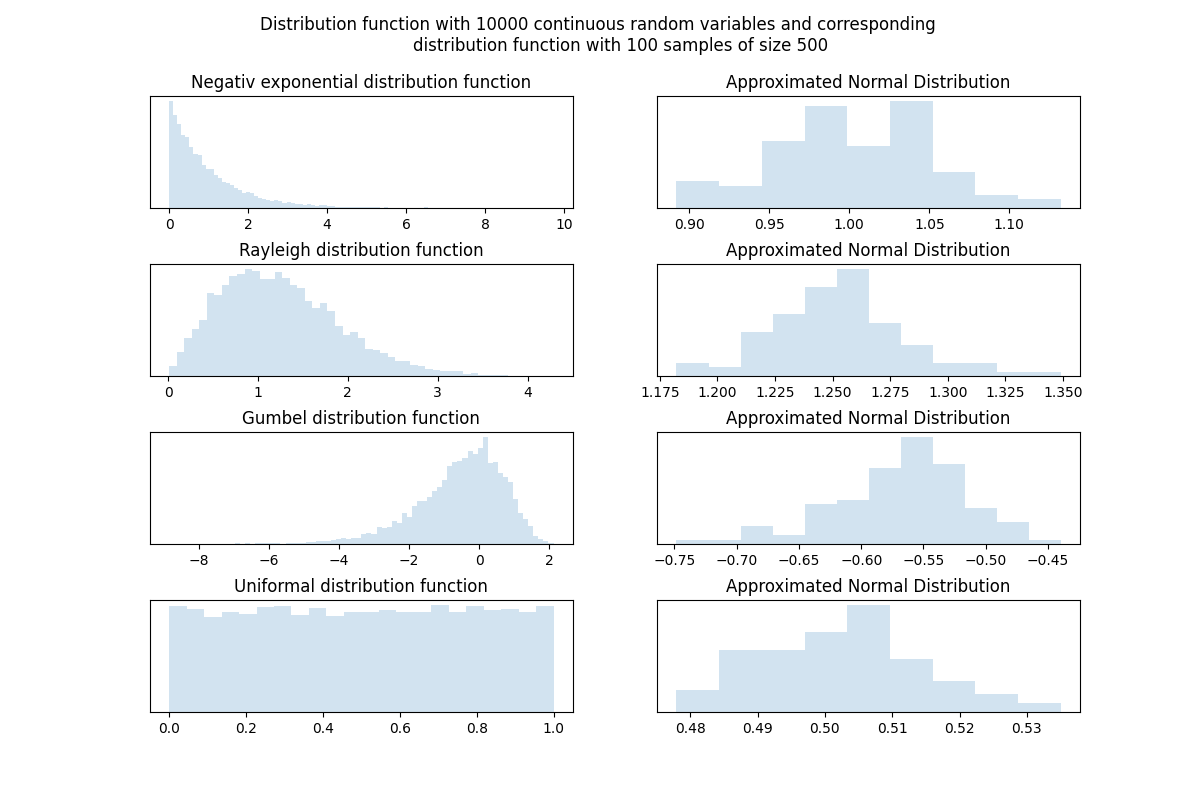

In [5]:
import numpy as np
import pandas as pd
from scipy.stats import expon, rayleigh, gumbel_l, uniform
import matplotlib.pyplot as plt
from ipywidgets import interact
import ipywidgets as widgets
from ipywidgets import widgets, IntSlider, FloatSlider, Dropdown, BoundedIntText

%matplotlib widget

def clt(N, population, iterations=100):
    """
    N = Sample size
    population = sample of distribution
    iterations = Number of samples selected
    """
    approx_distribution = []
    for i in range(iterations):
        selection = np.random.choice(len(population), N, replace=True)
        approx_distribution.append(np.mean(population[selection]))
    return approx_distribution
    
def exp_distribution(N):
    return expon.rvs(size=N)

def ray_distribution(N):
    return rayleigh.rvs(size=N)

def gum_distribution(N):
    return gumbel_l.rvs(size=N)

def uni_distribution(N):
    return uniform.rvs(size=N)

def central_limit_theorem():
    N = 1_000_000
    sample_size = 1_000
    number_samples = 1_000
    
    
    fig = plt.figure(figsize=(12, 8)) 
    gs = fig.add_gridspec(4, 2, height_ratios=[1, 1, 1, 1], hspace=0.5)  
    
    ax1 = fig.add_subplot(gs[0, 0])  
    ax2 = fig.add_subplot(gs[0, 1])  
    ax3 = fig.add_subplot(gs[1, 0])  
    ax4 = fig.add_subplot(gs[1, 1]) 
    ax5 = fig.add_subplot(gs[2, 0])  
    ax6 = fig.add_subplot(gs[2, 1]) 
    ax7 = fig.add_subplot(gs[3, 0])  
    ax8 = fig.add_subplot(gs[3, 1]) 
    
    exp = exp_distribution(N)
    ray = ray_distribution(N)
    gum = gum_distribution(N)
    uni = uni_distribution(N)
    
    
    ax1.hist(exp, density=True, bins='auto', histtype='stepfilled', alpha=0.2)
    ax3.hist(ray, density=True, bins='auto', histtype='stepfilled', alpha=0.2)
    ax5.hist(gum, density=True, bins='auto', histtype='stepfilled', alpha=0.2)
    ax7.hist(uni, density=True, bins='auto', histtype='stepfilled', alpha=0.2)
    
    af_exp = clt(sample_size, exp, number_samples)
    af_ray = clt(sample_size, ray, number_samples)
    af_gum = clt(sample_size, gum, number_samples)
    af_uni = clt(sample_size, uni, number_samples)
    
    ax2.hist(af_exp, density=True, bins='auto', histtype='stepfilled', alpha=0.2)
    ax4.hist(af_ray, density=True, bins='auto', histtype='stepfilled', alpha=0.2)
    ax6.hist(af_gum, density=True, bins='auto', histtype='stepfilled', alpha=0.2)
    ax8.hist(af_uni, density=True, bins='auto', histtype='stepfilled', alpha=0.2)

    def update_data(sample_size, number_samples, N):

        ax1.cla()
        ax2.cla()
        ax3.cla()
        ax4.cla()
        ax5.cla()
        ax6.cla()
        ax7.cla()
        ax8.cla()

        exp = exp_distribution(N)
        ray = ray_distribution(N)
        gum = gum_distribution(N)
        uni = uni_distribution(N)
        
        ax1.hist(exp, density=True, bins='auto', histtype='stepfilled', alpha=0.2)
        ax3.hist(ray, density=True, bins='auto', histtype='stepfilled', alpha=0.2)
        ax5.hist(gum, density=True, bins='auto', histtype='stepfilled', alpha=0.2)
        ax7.hist(uni, density=True, bins='auto', histtype='stepfilled', alpha=0.2)
        
        af_exp = clt(sample_size, exp, number_samples)
        af_ray = clt(sample_size, ray, number_samples)
        af_gum = clt(sample_size, gum, number_samples)
        af_uni = clt(sample_size, uni, number_samples)
        
        ax2.hist(af_exp, density=True, bins='auto', histtype='stepfilled', alpha=0.2)
        ax4.hist(af_ray, density=True, bins='auto', histtype='stepfilled', alpha=0.2)
        ax6.hist(af_gum, density=True, bins='auto', histtype='stepfilled', alpha=0.2)
        ax8.hist(af_uni, density=True, bins='auto', histtype='stepfilled', alpha=0.2)

        for ax in [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]:
            #ax.set_xticks([])
            ax.set_yticks([])

        ax1.set_title('Negativ exponential distribution function')
        ax2.set_title('Approximated Normal Distribution')
        ax3.set_title('Rayleigh distribution function')
        ax4.set_title('Approximated Normal Distribution')
        ax5.set_title('Gumbel distribution function')
        ax6.set_title('Approximated Normal Distribution')
        ax7.set_title('Uniformal distribution function')
        ax8.set_title('Approximated Normal Distribution')

        fig.suptitle(f'Distribution function with {N} continuous random variables and corresponding \n\
        distribution function with {number_samples} samples of size {sample_size}')


    num_samp = BoundedIntText(min=0, max=1_000_000, step=100, description=r"Number of samples", value=100)
    siz_samp = BoundedIntText(min=0, max=1_000, step=10, description=r"Sample size", value=500)
    num_dist = BoundedIntText(min=0, max=1_000_000, step=100, description=r"Distribution size", value=10_000)
    
    ui = widgets.HBox([widgets.VBox([num_samp, siz_samp, num_dist])])
    out = widgets.interactive_output(update_data, {'sample_size': siz_samp, 'number_samples': num_samp, 'N': num_dist})

    return display(out, ui)
        
    plt.show()

fig = central_limit_theorem()


